In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

DATA_FOLDER = "../DATA/"

In [2]:
train = pd.read_parquet(DATA_FOLDER + "RAW/train.parq").dropna().drop_duplicates()
train

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0
...,...,...,...,...,...,...,...,...,...,...,...
61629671,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:bruteforce,9606,191439,0
61629673,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:scan,9606,191439,0
61629674,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:exploit,9606,191439,0
61629681,2023-08-24 21:14:46+00:00,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,http:scan,40383,193446,0


In [3]:
relation_watcher_country_name = train[["label", "watcher_country", "watcher_as_name"]]
relation_watcher_country_name = relation_watcher_country_name.groupby(['watcher_as_name', "watcher_country"])['label'].value_counts().unstack().fillna(0).reset_index()
relation_watcher_country_name

C:\Users\Francisco\AppData\Local\Temp\ipykernel_8008\2825224535.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relation_watcher_country_name = relation_watcher_country_name.groupby(['watcher_as_name', "watcher_country"])['label'].value_counts().unstack().fillna(0).reset_index()


label,watcher_as_name,watcher_country,0,1
0,-Reserved AS,AD,0,0
1,-Reserved AS,AE,0,0
2,-Reserved AS,AL,0,0
3,-Reserved AS,AM,0,0
4,-Reserved AS,AO,0,0
...,...,...,...,...
360095,xneelo,UZ,0,0
360096,xneelo,VE,0,0
360097,xneelo,VI,0,0
360098,xneelo,VN,0,0


In [4]:
relation_watcher_country_name.rename(columns={1:"1", 0:"0"}, inplace=True)
relation_watcher_country_name

label,watcher_as_name,watcher_country,0,1
0,-Reserved AS,AD,0,0
1,-Reserved AS,AE,0,0
2,-Reserved AS,AL,0,0
3,-Reserved AS,AM,0,0
4,-Reserved AS,AO,0,0
...,...,...,...,...
360095,xneelo,UZ,0,0
360096,xneelo,VE,0,0
360097,xneelo,VI,0,0
360098,xneelo,VN,0,0


In [5]:
relation_watcher_country_name_only_vpn = relation_watcher_country_name[relation_watcher_country_name["1"] != 0]
relation_watcher_country_name_only_vpn

label,watcher_as_name,watcher_country,0,1
162,1&1 Versatel Deutschland GmbH,DE,23865,81
429,"10dencehispahard, S.L.",ES,3025,97
711,1984 ehf,IS,2289,43
1083,20i Limited,GB,56704,2013
1202,23M GmbH,DE,8411,142
...,...,...,...,...
359103,vXtream Ltd,GB,2698,25
359352,webgo GmbH,DE,94357,2211
359612,wilhelm.tel GmbH,DE,857,3
359872,xTom GmbH,DE,205,2


In [6]:
relation_watcher_country_name_only_vpn["total"] = relation_watcher_country_name_only_vpn["0"]+relation_watcher_country_name_only_vpn["1"]
relation_watcher_country_name_only_vpn["percentage"] = relation_watcher_country_name_only_vpn["1"]/relation_watcher_country_name_only_vpn["total"]*100
relation_watcher_country_name_only_vpn

C:\Users\Francisco\AppData\Local\Temp\ipykernel_8008\4046896661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relation_watcher_country_name_only_vpn["total"] = relation_watcher_country_name_only_vpn["0"]+relation_watcher_country_name_only_vpn["1"]
C:\Users\Francisco\AppData\Local\Temp\ipykernel_8008\4046896661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relation_watcher_country_name_only_vpn["percentage"] = relation_watcher_country_name_only_vpn["1"]/relation_watcher_country_name_only_vpn["tot

label,watcher_as_name,watcher_country,0,1,total,percentage
162,1&1 Versatel Deutschland GmbH,DE,23865,81,23946,0.338261
429,"10dencehispahard, S.L.",ES,3025,97,3122,3.106983
711,1984 ehf,IS,2289,43,2332,1.843911
1083,20i Limited,GB,56704,2013,58717,3.428309
1202,23M GmbH,DE,8411,142,8553,1.660236
...,...,...,...,...,...,...
359103,vXtream Ltd,GB,2698,25,2723,0.918105
359352,webgo GmbH,DE,94357,2211,96568,2.289578
359612,wilhelm.tel GmbH,DE,857,3,860,0.348837
359872,xTom GmbH,DE,205,2,207,0.966184


In [7]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
relation_watcher_country_name_only_vpn['percentage_bin'] = pd.cut(relation_watcher_country_name_only_vpn['percentage'], bins=bins, right=True)
relation_watcher_country_name_only_vpn

C:\Users\Francisco\AppData\Local\Temp\ipykernel_8008\645449532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relation_watcher_country_name_only_vpn['percentage_bin'] = pd.cut(relation_watcher_country_name_only_vpn['percentage'], bins=bins, right=True)


label,watcher_as_name,watcher_country,0,1,total,percentage,percentage_bin
162,1&1 Versatel Deutschland GmbH,DE,23865,81,23946,0.338261,"(0, 5]"
429,"10dencehispahard, S.L.",ES,3025,97,3122,3.106983,"(0, 5]"
711,1984 ehf,IS,2289,43,2332,1.843911,"(0, 5]"
1083,20i Limited,GB,56704,2013,58717,3.428309,"(0, 5]"
1202,23M GmbH,DE,8411,142,8553,1.660236,"(0, 5]"
...,...,...,...,...,...,...,...
359103,vXtream Ltd,GB,2698,25,2723,0.918105,"(0, 5]"
359352,webgo GmbH,DE,94357,2211,96568,2.289578,"(0, 5]"
359612,wilhelm.tel GmbH,DE,857,3,860,0.348837,"(0, 5]"
359872,xTom GmbH,DE,205,2,207,0.966184,"(0, 5]"


In [8]:
grouped = relation_watcher_country_name_only_vpn.groupby('percentage_bin').agg({'total': 'sum','percentage_bin': lambda x: x.value_counts().iloc[0]})
grouped = grouped.rename(columns={"percentage_bin": "amount_conecctions"}).reset_index()
grouped

C:\Users\Francisco\AppData\Local\Temp\ipykernel_8008\2322072390.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = relation_watcher_country_name_only_vpn.groupby('percentage_bin').agg({'total': 'sum','percentage_bin': lambda x: x.value_counts().iloc[0]})


label,percentage_bin,total,amount_conecctions
0,"(0, 5]",38807370,1812
1,"(5, 10]",599841,113
2,"(10, 15]",74452,28
3,"(15, 20]",56043,18
4,"(20, 25]",607,9
5,"(25, 30]",9478,3
6,"(30, 35]",28,3
7,"(35, 40]",7990,3
8,"(40, 45]",64,1
9,"(45, 50]",6446,4


In [9]:
grouped.columns

Index(['percentage_bin', 'total', 'amount_conecctions'], dtype='object', name='label')

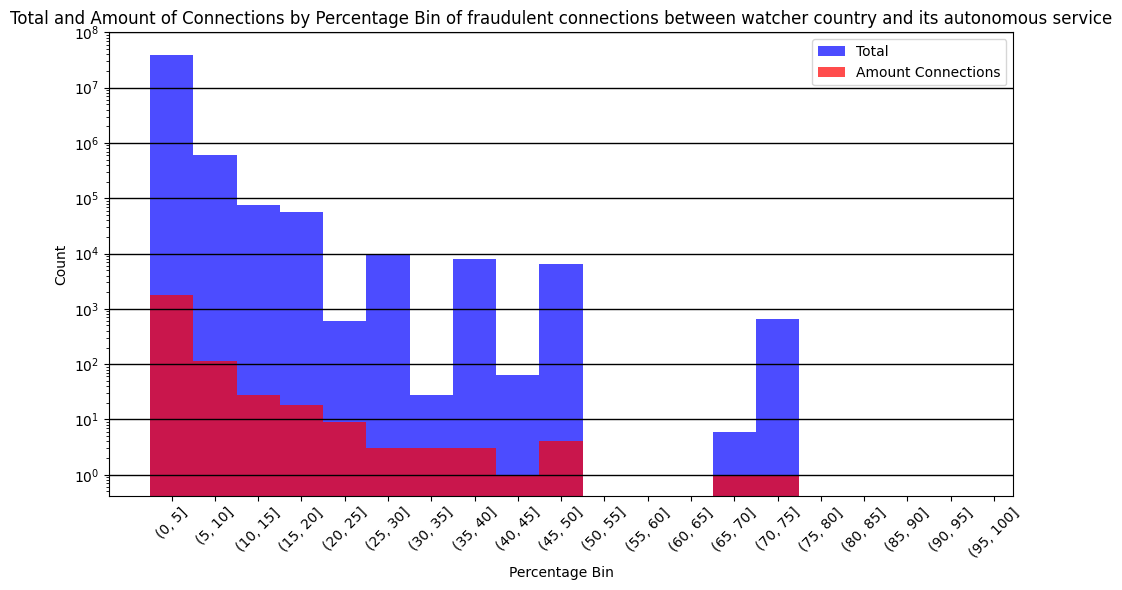

In [10]:

grouped['percentage_bin'] = grouped['percentage_bin'].astype(str)
# Define the numerical bins based on categorical labels
bins = ['(0, 5]', '(5, 10]', '(10, 15]', '(15, 20]', '(20, 25]',
       '(25, 30]', '(30, 35]', '(35, 40]', '(40, 45]', '(45, 50]',
       '(50, 55]', '(55, 60]', '(60, 65]', '(65, 70]', '(70, 75]',
       '(75, 80]', '(80, 85]', '(85, 90]', '(90, 95]', '(95, 100]']

# Creating the line plot with numerical bins
plt.figure(figsize=(10, 6))
plt.hist(grouped['percentage_bin'], bins=bins, weights=grouped['total'], label='Total', alpha=0.7, align='left', color = "blue")
plt.hist(grouped['percentage_bin'], bins=bins, weights=grouped['amount_conecctions'], label='Amount Connections', alpha=0.7, align='left', color = 'red')

# Adding labels and title
plt.xlabel('Percentage Bin')
plt.ylabel('Count')
plt.title('Total and Amount of Connections by Percentage Bin of fraudulent connections between watcher country and its autonomous service')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()  # Show legend
plt.yscale('log')
plt.yticks([10**i for i in range(9)])
plt.gca().yaxis.grid(True, linestyle='-', linewidth=1, color="black")
# Display the plot
plt.tight_layout()
plt.show()
